## 轮廓特征

 轮廓可以简单为成将连续的点（在边缘上）连在一起的曲线具有相同的颜色或者灰度。轮廓在形状分析和物体的检测和识别中很有用。
- 为了更加准确使用二值化图像。在寻找轮廓之前 ，要进行阈值化处理或者 Canny 边界检测。
- 查找轮廓的函数会修改原始图像。如果你在找到轮廓之后还想使用原始图像的话。你应该将原始图像存储到其他变量中。
- 在 OpenCV 中，查找轮廓就像在黑色背景中超白色物体。你应该记住，要找的物体应该是白色而背景应该是黑色。

### 轮廓检测
轮廓是一系列相连的点组成的曲线，代表了物体的基本外形。轮廓和边缘很像，简单来说轮廓是连续的，边缘并不是全部连续。便于主要作为图像的特征使用，比如可以用边缘特征区分手和脸，而轮廓主要用来分析物体的形态，比如物体的周长和面积等，可以说边缘包括轮廓。

![](images/2023-08-14-11-48-03.png)

寻找轮廓的操作一般作用与二值化图像，所以通常会使用阈值分割或Canny边缘检测得到二值图。


使用cv.findContours()寻找轮廓

![](images/2023-08-14-11-48-37.png)

函数会返回轮廓（contours）和轮廓的层次结构（hierarchy）。参考下列代码：

In [210]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
 
img = cv.imread('exp_images/handwriting.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
 
# 寻找二值化图中的轮廓
contours, hierarchy = cv.findContours(thresh,
                                      cv.RETR_TREE,
                                      cv.CHAIN_APPROX_SIMPLE)

hierarchy是轮廓的层级关系，contours是找到的轮廓，以数组形式存储，记录了每条轮廓的所有像素点坐标（x，y）。

![](images/2023-08-14-11-49-39.png)

### 轮廓绘制

绘制轮廓使用cv.drawContours()函数。它还可以用与绘制任何形状，前提是有其边界点。它的第一个参数是源图像，第二个参数应为轮廓的python列表，第三个参数是轮廓的索引（绘制所有轮廓传递-1），其余参数为颜色、厚度等。

绘制所有轮廓


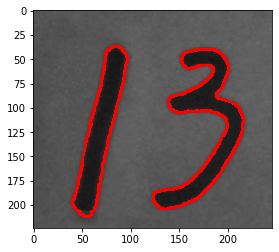

In [211]:
img_c = np.copy(img)
cv.drawContours(img_c, contours, -1, (0, 0, 255), 2)

plt.imshow(img_c[:,:,::-1])
plt.show()

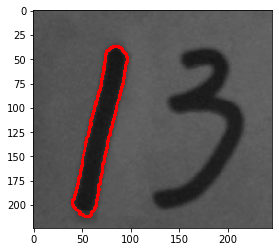

In [212]:
img_c = np.copy(img)
cv.drawContours(img_c, contours, 1, (0, 0, 255), 2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 轮廓面积和周长
轮廓面积由函数cv.contourArea()给出

In [213]:
cv.contourArea(contours[0])


4807.0

In [214]:
cv.arcLength(contours[0],True)

612.7838320732117

### 图像矩
在数字图像处理、计算机视觉与相关领域中，图像矩(Image moments)是指图像的某些特定像素灰度的加权平均值（矩），或者是图像具有类似功能或意义的属性。

![](images/2023-08-14-14-17-24.png)

矩可以理解为图像的各类几何特征，例如轮廓的质心、面积、方向等。其中面积由M[‘m00’]给出。

In [215]:
M = cv.moments(contours[0])
print(M)

{'m00': 4807.0, 'm10': 849431.6666666666, 'm01': 567076.0, 'm20': 152202834.8333333, 'm11': 98742806.83333333, 'm02': 78411253.5, 'm30': 27622130168.100002, 'm21': 17483376460.433334, 'm12': 13393681126.366667, 'm03': 12075225547.800001, 'mu20': 2102115.8118831217, 'mu11': -1463623.748457104, 'mu02': 11513980.819325984, 'mu30': -16129690.252017975, 'mu21': 45457166.5082975, 'mu12': -116830615.75261116, 'mu03': 108563520.76313782, 'nu20': 0.09097213657424653, 'nu11': -0.06334045859189485, 'nu02': 0.4982843617310733, 'nu30': -0.010067942397799047, 'nu21': 0.028373770780591508, 'nu12': -0.07292414741501461, 'nu03': 0.06776393448775536}


根据得到的矩，可以计算出轮廓的重心：

![](images/2023-08-14-15-00-31.png)

In [216]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centriod: ({0:.2f}, {1:.2f})".format(cx,cy))

centriod: (176.00, 117.00)


### 外接矩形
这是一个垂直矩形，它不考虑对象的旋转。因此，此矩形的面积不会是最小的。函数cv.boundingRect()可以得到矩形的信息：中心(x,y),高度、宽度(w,h)。

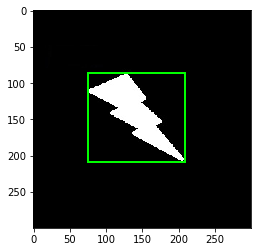

In [217]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('exp_images/lightning.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
 
# 寻找二值化图中的轮廓
contours, hierarchy = cv.findContours(thresh,
                                      cv.RETR_TREE,
                                      cv.CHAIN_APPROX_SIMPLE)

cnt = contours[1]

x,y,w,h = cv.boundingRect(cnt) # 外接矩形
img_c = np.copy(img)
cv.rectangle(img_c,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 最小外接矩形
这里。边界矩形是用最小面积绘制的，因此它考虑了旋转。使用的函数是cv.minAreaRect()它返回一个Box2D结构，其中包含以下详细信息-( center (x,y), (width, height), angle of rotation )。再使用cv.boxPoint()函数查找旋转矩形的四个顶点，用于绘制旋转的矩形。


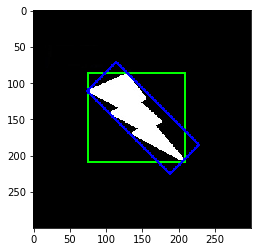

In [218]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(img_c,[box],0,(255,0,0),2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 最小外接圆
外接圆跟外接矩形一样，找到一个能包围物体的最小圆。使用cv.minEnclosingCirle()找到对象的圆周。它是一个圆，以最小的面积完全覆盖物体。

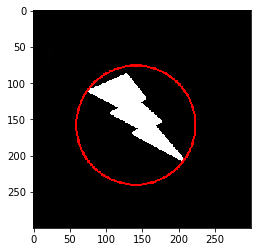

In [219]:
img_c = np.copy(img)
(x,y),radius = cv.minEnclosingCircle(cnt)
(x,y,radius) = np.int0((x,y,radius))
cv.circle(img_c,(x,y),radius,(0,0,255),2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 拟合椭圆

将椭圆拟合到对象。它返回在其中刻有椭圆的旋转矩形。

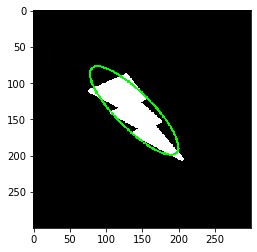

In [220]:
img_c = np.copy(img)
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img_c,ellipse,(0,255,0),2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 直线拟合

我们可以根据一组点拟合出一条直线虽同样我们也可以为图像中的白色点拟合出一条直线。

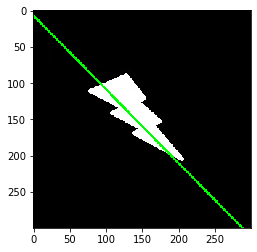

In [221]:
img_c = np.copy(img)

rows,cols = img.shape[:2]

[vx,vy,x,y] = cv.fitLine(cnt,cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv.line(img_c,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.imshow(img_c[:,:,::-1])
plt.show()

### 多边形逼近
于噪声和光照的影响，物体的轮廓会出现不规则的形状，根据不规则的轮廓形状不利于对图像内容进行分析，此时需要将物体的轮廓拟合成规则的几何形状，根据需求可以将图像轮廓拟合成矩形、多边形等。这就是多边形逼近（轮廓近似），它是Douglas-Peucker算法实现的，我们使用cv.approxPloyDP()函数完成这一操作。

![](images/2023-08-14-15-23-19.png)

我们将epsilon设置为50，参考下列代码：

In [222]:
import cv2 as cv
import numpy as np
img = cv.imread('exp_images/unregular.jpg',0)
_,thresh = cv.threshold(img,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
contours,hierarchy = cv.findContours(thresh,3,2)
cnt = contours[0]
 
approx = cv.approxPolyDP(cnt,50,True)
 
img = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
cv.polylines(img,[approx],True,(0,255,0),2)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

不同epsilon值的效果：

![](images/2023-08-14-15-24-02.png)

### 凸包

凸包跟多边形逼近很像，只不过它是物体最外层的“凸”多边形：集合A内连接任意两个点的直线都在A的内部，则称集合A是凸形的。如下图，红色部分为手掌的凸包，双箭头部分表示凸缺陷（Convexity Defects），凸缺陷常用来进行手势识别等：

![](images/2023-08-14-15-25-17.png)

函数cv.convexHull()有以下几个参数。

![](images/2023-08-14-15-25-40.png)

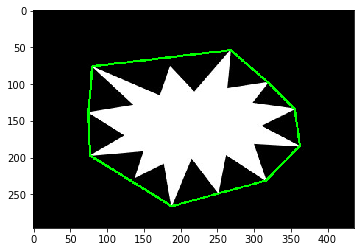

In [223]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('exp_images/convex.jpg',0)

_,thresh = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
contours,hierarchy = cv.findContours(thresh,3,2)
cnt = contours[0]
 
# 查找凸包，得到凸包的角点
hull = cv.convexHull(cnt)
 
# 绘制凸包
img = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
img_c = np.copy(img)
cv.polylines(img_c,[hull],True,(0,255,0),2)
 
plt.imshow(img_c[:,:,::-1])
plt.show()

当我们将returnPoints=False后会得到返回轮廓中的凸包角点的索引：

In [224]:
print(hull[0])
hull2 = cv.convexHull(cnt,returnPoints=False)
print(hull2[0])
print(cnt[634])

[[319  98]]
[634]
[[319  98]]


这样我们得到了角点hull[0]的坐标为（319，98），在轮廓中的索引为[634]。

# 轮廓的性质
## 长宽比
边界矩形的宽高比

![](images/2023-08-14-15-38-53.png)

In [225]:
x, y, w, h = cv.boundingRect(cnt)
aspect_ratio = float(w) / h

print(aspect_ratio)

1.352112676056338


## Extent
轮廓面积与边界矩形面积的比。

![](images/2023-08-14-15-40-35.png)

In [226]:
area = cv.contourArea(cnt)
x, y, w, h = cv.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area

print(extent)

0.41577823422013566


## 可靠性（Solidity）
轮廓面积与凸包面积的比。

In [227]:
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area) / hull_area

print(solidity)

0.5610166509029321


## 等效直径（Equivalent Diameter）
与轮廓面积相等的圆形的直径

In [228]:
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4 * area / np.pi)

print(equi_diameter)

180.20713417687628


## 轮廓方向

对象的方向,下面的方法会返回长轴和短轴的长度

In [229]:
(x, y), (MA, ma), angle = cv.fitEllipse(cnt)

print(angle)

96.40816497802734


## 极点
一个对象最上面，最下面，最左边，最右边的点

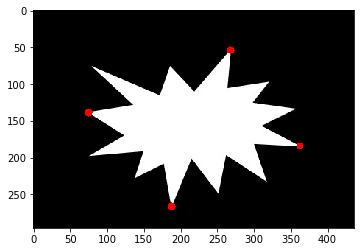

In [230]:
# 极点 一个对象最上面  最下面  最左  最右 的点。
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

img_c = np.copy(img)
cv.circle(img_c,leftmost,5,(255,0,0),-1)
cv.circle(img_c,rightmost,5,(255,0,0),-1)
cv.circle(img_c,topmost,5,(255,0,0),-1)
cv.circle(img_c,bottommost,5,(255,0,0),-1)

plt.imshow(img_c)
plt.show()

## 形状匹配
函数 cv2.matchShape() 可以帮我们比 两个形状或 廓的相似度。
如果返回值越小， 匹配越好。它是根据 Hu 矩来计算的。文档中对不同的方法有解释。


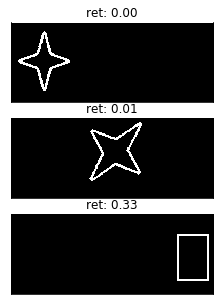

In [231]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('exp_images/star.jpg', 0)
img2 = cv.imread('exp_images/star2.jpg', 0)

ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)

contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[2]
contours,hierarchy = cv.findContours(thresh2,2,1)

# 可视化
num = [7,8,6]
plt.figure(figsize=(10,5))
for i in range(3):
    cnt2 = contours[num[i]]
    ret = cv.matchShapes(cnt1,cnt2,1,0.0)
    img4 = cv.drawContours(img2*0, cnt2, -1, (255, 0, 0), 4)
    plt.subplot(3,1,i+1),plt.imshow(img4,cmap="gray"),plt.title("ret: {0:.2f}".format(ret))
    plt.xticks([]),plt.yticks([])
plt.show()